In [98]:
# Import Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pathlib import Path

In [99]:
# Read in csv

crime_data_csv = Path("../chicago_crimes_all_cleaned.csv")

crime_data_df = pd.read_csv(crime_data_csv)

crime_data_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11556487,JC104662,12/31/2018 11:59:00 PM,112XX S SACRAMENTO AVE,1320,MINOR PROPERTY CRIME,TO VEHICLE,STREET,False,False,...,19.0,74.0,14,1158309.0,1829936.0,2018,01/10/2019 03:16:50 PM,41.689079,-87.696064,"(41.689078832, -87.696064026)"
1,11552699,JC100043,12/31/2018 11:57:00 PM,084XX S SANGAMON ST,1310,MINOR PROPERTY CRIME,TO PROPERTY,APARTMENT,False,False,...,21.0,71.0,14,1171454.0,1848783.0,2018,01/10/2019 03:16:50 PM,41.740521,-87.647391,"(41.740520866, -87.647390719)"
2,11552724,JC100006,12/31/2018 11:56:00 PM,018XX S ALLPORT ST,0440,ASSAULT & BATTERY,AGG: HANDS/FIST/FEET NO/MINOR INJURY,OTHER,True,False,...,25.0,31.0,08B,1168327.0,1891230.0,2018,01/10/2019 03:16:50 PM,41.857068,-87.657625,"(41.857068095, -87.657625201)"
3,11552731,JC100031,12/31/2018 11:55:00 PM,078XX S SANGAMON ST,0486,ASSAULT & BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,...,17.0,71.0,08B,1171332.0,1852934.0,2018,01/10/2019 03:16:50 PM,41.751914,-87.647717,"(41.75191443, -87.647716532)"
4,11552715,JC100026,12/31/2018 11:49:00 PM,052XX W GLADYS AVE,041A,ASSAULT & BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,...,29.0,25.0,04B,1140262.0,1897810.0,2018,03/28/2020 03:47:02 PM,41.875684,-87.760479,"(41.87568438, -87.760479356)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163207,12847575,JF420478,9/1/2022 5:00,005XX W SURF ST,2825,OTHER MINOR CRIMES,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,1/3/2023 15:46,41.934305,-87.641485,"(41.934304581, -87.641484982)"
1163208,12847801,JF420319,7/8/2022 0:00,114XX S PRAIRIE AVE,1130,THEFT (ALL TYPES),FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,1/3/2023 15:46,41.685544,-87.616813,"(41.685543881, -87.616812541)"
1163209,12847324,JF420102,9/27/2022 11:00,023XX E 70TH ST,810,THEFT (ALL TYPES),OVER $500,RESIDENCE,False,False,...,5.0,43.0,6,1193181.0,1859005.0,2022,1/3/2023 15:46,41.768068,-87.567453,"(41.768068052, -87.567452932)"
1163210,12847570,JF420427,9/3/2022 10:25,052XX W CARMEN AVE,2021,DRUG RELATED,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,1/3/2023 15:46,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [100]:
crime_data_df["Year"].value_counts()

2018    262837
2019    258163
2022    232532
2020    207437
2021    202243
Name: Year, dtype: int64

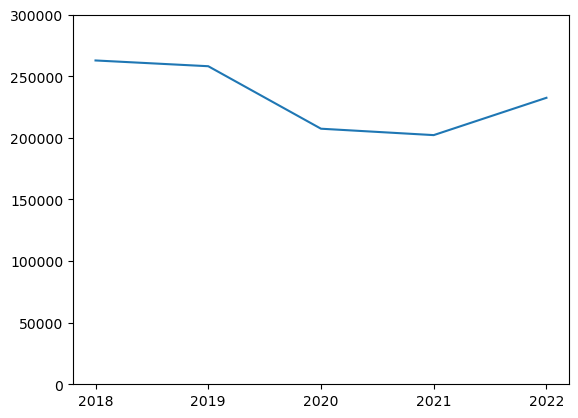

In [101]:
x_axis = ["2018", "2019", "2020", "2021", "2022"]
y_axis = [262837, 258163, 207437, 202243, 232532]

plt.plot(x_axis, y_axis)
plt.ylim(0, 300000)

plt.savefig("Images/total.png")

In [102]:
crime_data_df["Primary Type"].value_counts()

THEFT (ALL TYPES)                   484967
ASSAULT & BATTERY                   323858
MINOR PROPERTY CRIME                156167
OTHER MINOR CRIMES                   87404
DRUG RELATED                         43137
WEAPONS RELATED CRIME                38697
SEXUAL RELATED CRIME                 12597
OFFENSE INVOLVING CHILDREN            9948
HOMICIDE                              3439
ARSON                                 2278
KIDNAPPING AND HUMAN TRAFFICKING       717
NON-CRIMINAL (SUBJECT SPECIFIED)         3
Name: Primary Type, dtype: int64

In [103]:
grouped_df = crime_data_df.groupby(["Primary Type", "Year"])[["Case Number"]].count().sort_values(by = "Case Number", ascending = False)

grouped_df


Case Number
Primary Type                     Year             
THEFT (ALL TYPES)                2018       112546
                                 2019       105518
                                 2022       105053
                                 2020        82573
                                 2021        79277
ASSAULT & BATTERY                2019        70459
                                 2018        70420
                                 2022        61969
                                 2021        61039
                                 2020        59971
MINOR PROPERTY CRIME             2018        34580
                                 2019        33416
                                 2022        31102
                                 2020        28846
                                 2021        28223
OTHER MINOR CRIMES               2018        20935
                                 2019        20913
                                 2022        15862
DRUG RELATED                     2019        15002
OTHER MINOR CRIMES               2021        14882
                                 2020        14812
DRUG RELATED                     2018        12797
WEAPONS RELATED CRIME            2021         9114
                                 2022         8872
                                 2020         8565
DRUG RELATED                     2020         7275
WEAPONS RELATED CRIME            2019         6554
                                 2018         5592
DRUG RELATED                     2021         4091
                                 2022         3972
SEXUAL RELATED CRIME             2019         2892
                                 2022         2628
                                 2018         2621
                                 2021         2423
OFFENSE INVOLVING CHILDREN       2019         2342
                                 2018         2186
SEXUAL RELATED CRIME             2020         2033
OFFENSE INVOLVING CHILDREN       2020         1857
                                 2022         1802
                                 2021         1761
HOMICIDE                         2021          810
                                 2020          796
                                 2022          724
                                 2018          601
ARSON                            2020          586
                                 2021          527
HOMICIDE                         2019          508
ARSON                            2022          418
                                 2019          374
                                 2018          373
KIDNAPPING AND HUMAN TRAFFICKING 2019          185
                                 2018          183
                                 2022          130
                                 2020          123
                                 2021           96
NON-CRIMINAL (SUBJECT SPECIFIED) 2018            3

In [104]:
years = ["2018", "2019", "2020", "2021", "2022"]
theft_counts = [112546, 105518, 82573, 79277, 105053]
assault_counts = [70420, 70459, 59971, 61039, 61969]
property_counts = [34580, 33416, 28846, 28233, 31102]
minor_counts = [20938, 20913, 14812, 14882, 15862]
drug_counts = [12797, 15002, 7275, 4091, 3972]
weapons_counts = [5592, 6554, 8565, 9114, 8872]
sexual_counts = [2621, 2892, 2033, 2423, 2628]
children_counts = [2186, 2342, 1857, 1761, 1802]
homicide_counts = [601, 508, 796, 810, 724]
arson_counts = [373, 374, 586, 527, 418]
kidnapping_counts = [183, 185, 123, 96, 130]


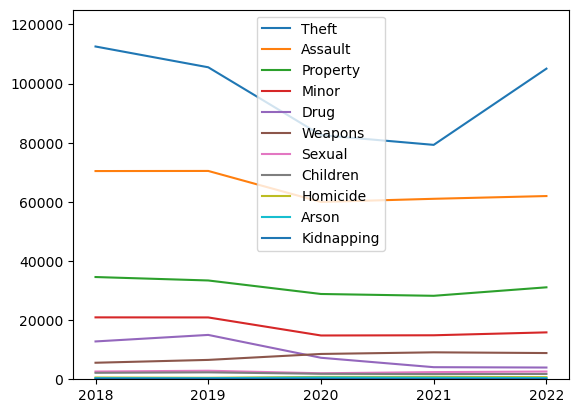

<Figure size 640x480 with 0 Axes>

In [105]:
plt.plot(years, theft_counts, label="Theft")
plt.plot(years, assault_counts, label="Assault")
plt.plot(years, property_counts, label="Property")
plt.plot(years, minor_counts, label="Minor")
plt.plot(years, drug_counts, label="Drug")
plt.plot(years, weapons_counts, label="Weapons")
plt.plot(years, sexual_counts, label="Sexual")
plt.plot(years, children_counts, label="Children")
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/all_types.png")


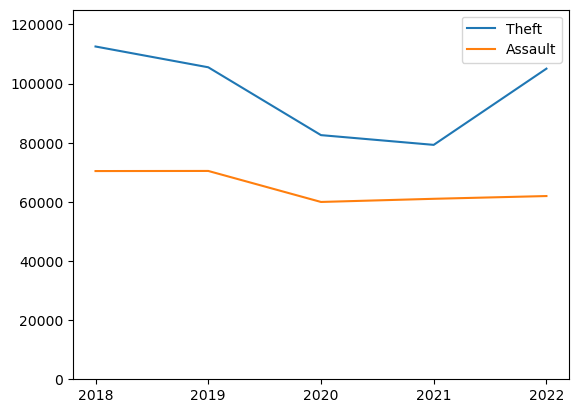

<Figure size 640x480 with 0 Axes>

In [106]:
plt.plot(years, theft_counts, label="Theft")
plt.plot(years, assault_counts, label="Assault")
plt.ylim(0, 125000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/highest_volume.png")

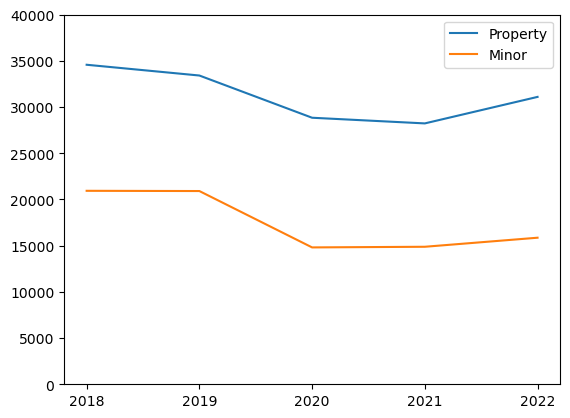

<Figure size 640x480 with 0 Axes>

In [107]:
plt.plot(years, property_counts, label="Property")
plt.plot(years, minor_counts, label="Minor")
plt.ylim(0, 40000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/high_volume.png")

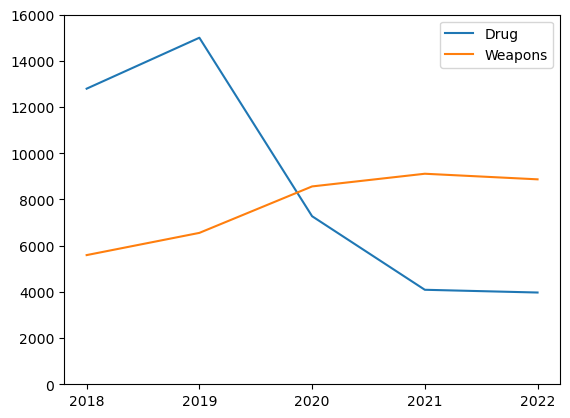

<Figure size 640x480 with 0 Axes>

In [108]:
plt.plot(years, drug_counts, label="Drug")
plt.plot(years, weapons_counts, label="Weapons")
plt.ylim(0, 16000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/medium_volume.png")

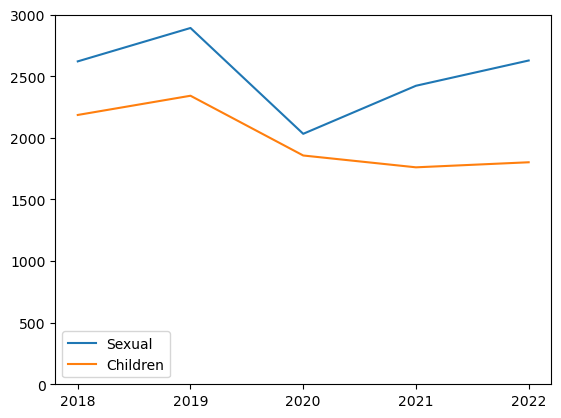

<Figure size 640x480 with 0 Axes>

In [109]:
plt.plot(years, sexual_counts, label="Sexual")
plt.plot(years, children_counts, label="Children")
plt.ylim(0, 3000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/low_volume.png")

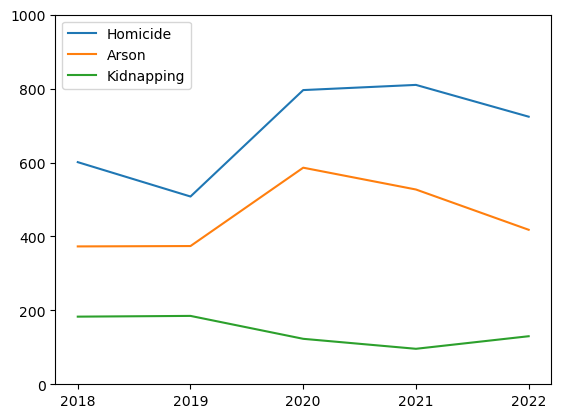

<Figure size 640x480 with 0 Axes>

In [110]:
plt.plot(years, homicide_counts, label="Homicide")
plt.plot(years, arson_counts, label="Arson")
plt.plot(years, kidnapping_counts, label="Kidnapping")
plt.ylim(0, 1000)
plt.legend(loc="best")
plt.show()
plt.savefig("Images/lowest_volume.png")